# Tutorial Sub-aggregated Temporal network 

In [87]:
from SubTempNet import *

We create an object STN by calling the class SubTempNet and we pass the arguments:
- filename of the edgelist we want to analyze. It must be a tap-separated list containinga all edges (u,v,t) in the form "u \tap v \tap t"
- object name we want to use to save plots
- directed: Bool if the temporal network is directed (True) or undirected (False)

In [90]:
STN = SubTempNet("data/highschool2012.edges", "objname",directed= False)

The object inherits from the dictionary class and therefore also can be accessed like a dictionary. Bellow we see accessible keys:

In [8]:
STN.keys()

dict_keys(['filename', 'objname', 'directed', 'A', 't_to_snapshot', 'ecount', 'ncount', 'active edges', 'T', 'Tcomp', 'deg_seq', 'casual paths', 'cA0AT', 'cA0AL'])

- STN[ 'filename' ] stores the filename of the edgelist that is passt to the class when first instatiated
- STN[ 'objname' ] stores the objectname that is passt to the class when first instatiated
- STN[ 'directed' ] stores a boolian if the temporal network is directed or undirected
- STN[ 'A' ] stores the snapshotlist, saved as a list of sparse matrixes, only containing snapshots with active edges
- STN[ 't_to_snapshot' ] is a dictionary that has the time of each active snapshot as key and it's position in STN[ 'A' ] as value, so it gives a mapping from real time to compressed time.
- STN[ 'ecount' ] saves the number of temporal edges in the edgelist
- STN[ 'ncount' ] saves the number of nodes
- STN[ 'active edges' ] saves the number of active edges for each snapshot (only if there is at least one active)
- STN[ 'T' ] saves the length of the temporal network
- STN[ 'Tcomp' ] saves the number of temporal edges in the edgelist
- STN[ 'casual paths' ] is a list tracking the number of casual paths during the unfolding of the temporal accessibility
- STN[ 'cA0AT' ] is a dictionary that saves $c_{\mathcal{A},\mathbf{A}}$. The key is the length of the temporal network samples. The value is a list containing $c_{\mathcal{A},\mathbf{A}}$ for each sample.
- STN[ 'cA0AL' ] is a dictionary that saves $c_{\mathcal{A},\mathcal{A}_L}$. The key is the length of the temporal network samples. The value is a list containing $c_{\mathcal{A},\mathbf{A}}$ for each sample.


By using print() on the object STN, we get the most important informations about the temporal network and the object

In [10]:
print(STN)

filename =	data/highschool2012.edges
objname =	objname_SubTempNet
directed =	False
ncount = 	92
ecount = 	19654
T = 		49382
Tcomp = 	7104



We can plot the activity of the snapshots in different ways::

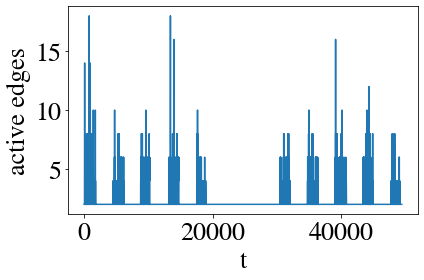

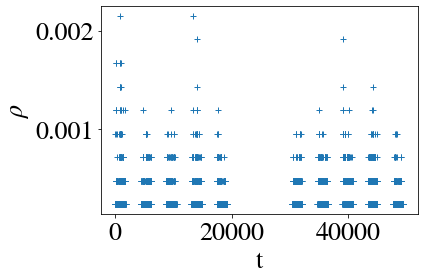

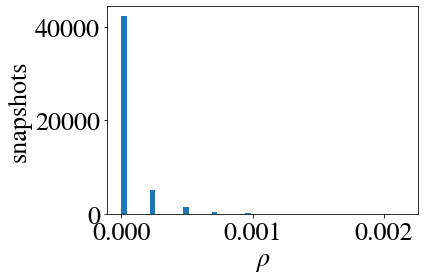

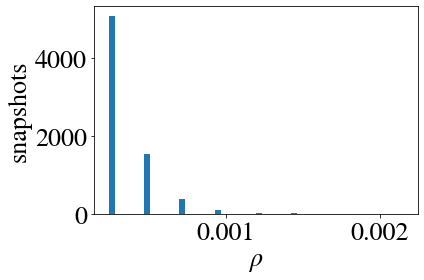

In [92]:
#plot the number of active edges per snapshot
STN.plot_activity(save = True)

#plot the density per snapshot
STN.plot_density(save = True)

#plot the histogram of the density of all snapshots
STN.plot_densityhist(save = True)

#plot the histogram of the density of all snapshots without considering empty snapshots
STN.plot_densityhist(comp = True,save = True)

# Sampling temporal networks with different sample-length T

Lets analyze $c_{\mathcal{A},\mathbf{A}}$ for temporal network samples of different length T. We want to analyze 50 logspaced values of T. 


In [93]:
T = sorted(list(np.logspace(np.log10(STN["T"]), 0, 50, dtype = int)) ,reverse = True)

We call "STN.run_cA0AT()" with
- *T: values for temporal network sample lengths
- maxsample: maximal number of samples that should be analysed for a given  T
- minsample: minimal number of samples that schould be analysed for a given T, This is not respected for large T since the samples overlap too much

In [94]:
STN.run_cA0AT(*T, maxsamp = 50, minsamp = 5)

Done with samplelengths  [49382, 39607, 31768, 25480, 20437, 16392, 13147, 10545, 8458, 6783, 5441, 4364, 3500, 2807, 2251, 1806, 1448, 1161, 931, 747, 599, 480, 385, 309, 248, 199, 159, 128, 102, 82, 66, 52, 42, 34, 27, 21, 17, 14, 11, 9, 7, 5, 4, 3, 3]
Analyzing sample number 51 for samplelength  2


We plot the results from the analysis by "STN.plot_cA0AT()" with:
- alldost: True: plot all sample results, False: only plot mean
- shade: True: plot min-max and Q1-Q3 of sample results 
- save: saves plot at "plots/objname_cA0AT_inttype", requires that folder "plots" exists

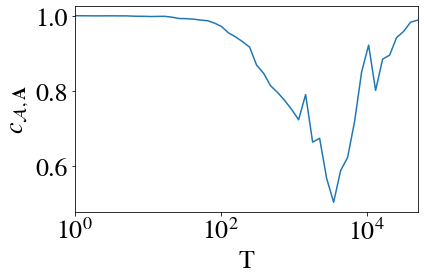

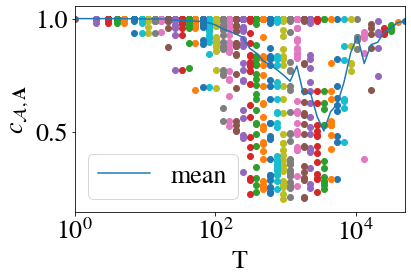

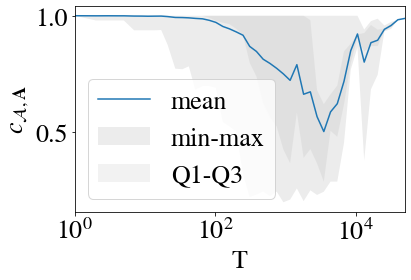

In [95]:
STN.plot_cA0AT(alldots = False, save = False)
STN.plot_cA0AT(shade = False, alldots = True, save = False)
STN.plot_cA0AT(shade = True, alldots = False, save = False)

To fit an theoretical log-normal function as well as an optimal log-normal function, we call "STN.ER_fit()". It plots the simulation results (sim), the theoretical fit (theo) and the optimal fit (opt). Further it returns a dictionary containing the values of the critical minimumg and critical temporal network length in all cases as well as the different goodnes of fits. 

{'p': 4.7539330027404365e-05,
 'CM sim': 0.5028388820841597,
 'CT sim': 3500,
 'MC theo': 0.1065270557392407,
 'TC theo': 493.67194642852024,
 'R2 theo': -3.190804314000607,
 'EMC theo': 0.396311826344919,
 'ETC theo': 0.24001502938208827,
 'MC opt': 0.6221908837459379,
 'TC opt': 2807,
 'R2 opt': 0.9056664154757245,
 'EMC opt': 0.11935200166177817,
 'ETC opt': 0.02703831600202917}

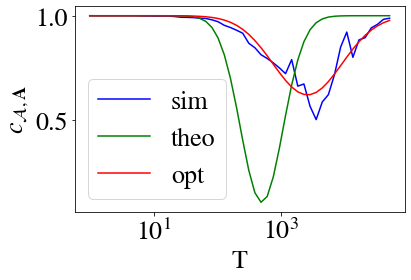

In [96]:
results, ax = STN.ER_fit(save = True)
results

Done with samplelengths  []
Analyzing sample number 30 for samplelength  7
all runned


({'mean deg': 0.008652158064987594,
  'TC^': 315.0,
  'MC sim': 0.5028388820841597,
  'TC sim': 3500,
  'MC fit': 0.6667356600441133,
  'TC fit': 599,
  'R2': -1.2893189390394593,
  'EMC': 0.1638967779599536,
  'ETC': 0.21631673330400475},
 <matplotlib.axes._subplots.AxesSubplot at 0x1e75875a5f8>)

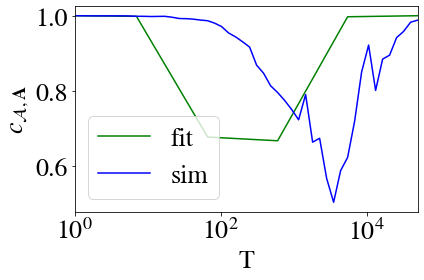

In [100]:
results, ax = STN.EDS_fit(save = True, sample = [None,None,10])
results

# Sub-aggregating temporal network

To analyse sub-aggregated temporal networks, we have to specify the sample length T as well as the values for the interval lengths L we want to sub aggregate. 

In [97]:
#List of temporal network lengths we want to analyze
Tlist = [STN["T"],STN["T"]//4,STN["T"]//16,STN["T"]//64,STN["T"]//256]

for T in Tlist:
    #List of L-values we want to sub-aggregate
    L=sorted(list(set([1]+[T//(2**i) for i in range(0,int(np.ceil(np.log2(T))))])), reverse=True)
    STN.run_cA0AL(T,*L, maxsamp = 50, minsamp = 20)

Done with 6 samples
Currently analyzing L-Sub with intervallength 1 for sample number 7 of sample length 192


We can plot the results in different ways:

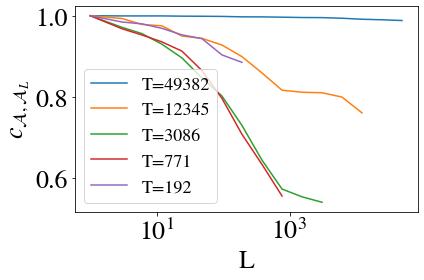

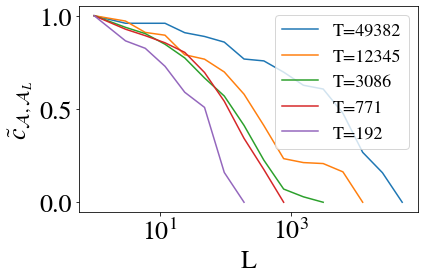

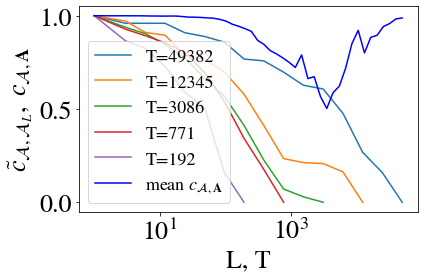

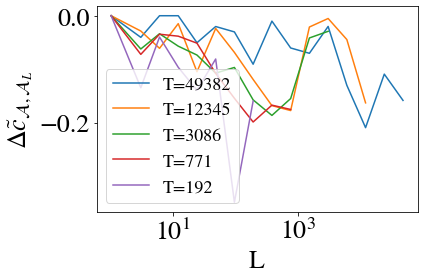

In [98]:
#plot cA0AL
STN.plot_cA0AL(*Tlist) 

#plot the normalized version ~cA0AL
STN.plot_cA0AL(*Tlist, normalized = True)

#plot the normalized version ~cA0AL and cA0AT in the same plot
STN.plot_cA0AL(*Tlist, normalized = True,  cA0AT = True)

#plot the change of ~cA0AL
STN.plot_cA0AL(*Tlist, normalized = True, change = True)